# Indian Airlines Ticket Price
Indian Airlines Ticket Price Analysis

#### Source: Kaggle 
(A Data Science Company)
 
### Link: [Indian Airlines Ticket Price][def]

[def]: https://www.kaggle.com/datasets/dhirajbembade/indian-airlines-ticket-price-analysis

### Objective
Aim to answer questions like No. of flights available across India, Ticket availability across different class, Price range across different class, etc. 

### About the dataset
The dataset includes details on the ticket booking alternatives available through the website "Easemytrip" for flights between India's top 6 metro areas. The cleaned dataset contains 11 characteristics and 300261 datapoints. Data was gathered in two stages: for business class tickets and for economy class tickets. The site provided a total of 300261 unique flight booking possibilities. 50 days of data were gathered, from February 11 to March 31 of 2022.

The various features of the dataset are explained below:

Airline: The airline column contains the name of the airline firm.

Flight: The flight code of the aircraft is stored in flight.

Source City: City where the flight departs from is a classification feature with 6 distinctive cities.

Departure Time: This is a categorical feature that was deduced from time periods being divided into bins.

Stops: A category feature that holds the number of stops between the source and destination cities.

Arrival Time: This derived categorical feature was developed by binning time intervals. It maintains information regarding the arrival time.

Destination City: The location of the aircraft's landing.

Class: A permanent feature that shows the total number of hours needed to travel between cities.

Duration: A permanent feature that shows the total number of hours needed to travel between cities.

Days Left: The trip date is subtracted from the booking date to arrive at this derived feature.

Price: Information about the ticket price is stored in the target variable.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\umaha\OneDrive\Desktop\Data Sets\projectpurpose\Indian Airlines.csv\Indian Airlines.csv")
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


> --> Lets understand numericals of data frame by describing*

In [3]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


> --> Knowing the size of data

In [4]:
df.size

3301683

> --> Finding the nulls/ NaN 

In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

> --> Number of unique values of a specific column 


In [6]:
df["airline"].nunique()

6

> --> Finding the list of unique values of a specific column

In [7]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [8]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [9]:
df["flight"].count()

np.int64(300153)

In [10]:
df["flight"].nunique()

1561

In [11]:
df["flight"].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

In [12]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [13]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [14]:
df["stops"].nunique()

3

In [15]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [16]:
df["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [17]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [18]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

> --> Lets Change Chart Style

In [19]:
print(plt.style.available)
plt.style.use("ggplot")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


> --> Lets know the unique values of catagory gouped by 

In [20]:
df.groupby("airline").agg({"flight":["count","nunique"]})

flight        
            count nunique
airline                  
AirAsia     16098     115
Air_India   80892     218
GO_FIRST    23173     205
Indigo      43120     704
SpiceJet     9011     186
Vistara    127859     133

In [21]:
pd.reset_option("display.max_rows")

In [22]:
df.groupby(["airline","flight"]).agg({"price":["mean","max","min","std","sum"]}).round(2)

price                                   
                     mean     max    min       std       sum
airline flight                                              
AirAsia I5-1228   3320.69   11783   1603   1947.07    478179
        I5-1229   3457.47   20267   1443   2590.76   1410646
        I5-1321   3726.35    9799   2723   1439.46    309287
        I5-1426   3815.16    9799   1714   1796.96    530307
        I5-1427  15140.50   17621  12660   3507.96     30281
...                   ...     ...    ...       ...       ...
Vistara UK-988   37685.53  106476   2339  29787.45  52043718
        UK-993   30494.01   82553   2700  24981.20  27780045
        UK-994   36401.10  101531   2339  28790.62  46338595
        UK-995   31270.54   99129   2700  25514.69  32021033
        UK-996   38622.83  114523   2339  30620.25  48896509

[1561 rows x 5 columns]

C:\Users\umaha\AppData\Local\Temp\ipykernel_2308\3204432339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="flight",y="airline",data=sort_unq_flights,palette="Set2")


Text(0, 0.5, 'Air lines')

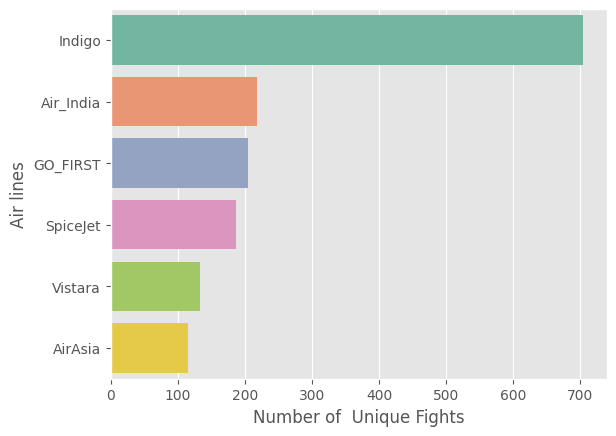

In [23]:
unq_flights = df.groupby("airline").agg({"flight":"nunique"})
sort_unq_flights = unq_flights.sort_values(by="flight",ascending= False)
sort_unq_flights.plot( kind= "barh",legend=False)
sns.barplot(x="flight",y="airline",data=sort_unq_flights,palette="Set2")
plt.xlabel("Number of  Unique Fights")
plt.ylabel("Air lines")

👆 The Above Horizontal Bar graph gives insights about unique number of flights run by different Airlines

C:\Users\umaha\AppData\Local\Temp\ipykernel_2308\522141606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="source_city",y="flight",data=sort_source,palette="Reds")


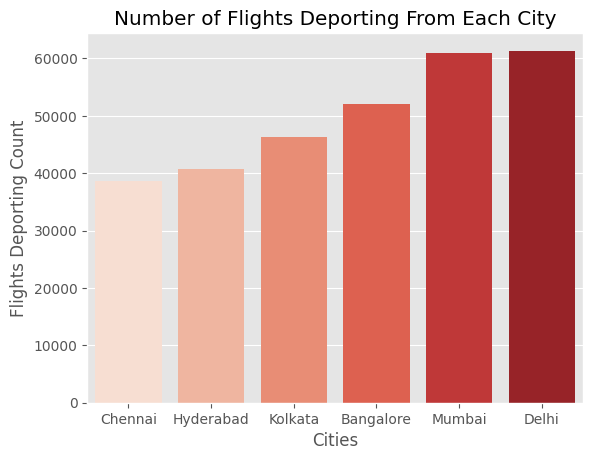

In [24]:
source = df.groupby("source_city").agg({"flight":"count"}).reset_index()
sort_source = source.sort_values(by="flight", ascending= True)
sns.barplot(x="source_city",y="flight",data=sort_source,palette="Reds")
plt.xlabel("Cities")
plt.ylabel("Flights Deporting Count")
plt.title("Number of Flights Deporting From Each City")
plt.show()

👆👆👆 The Palette Density in this chart describes the value count of each caragory. Least fligts are deporting from Chennai and Delhi is hightest in deporting flights 🛫🛫🛫


C:\Users\umaha\AppData\Local\Temp\ipykernel_2308\3914336922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="destination_city",y="flight",data=sort_destination,palette="Blues")


Text(0, 0.5, 'Flights Arriving Count')

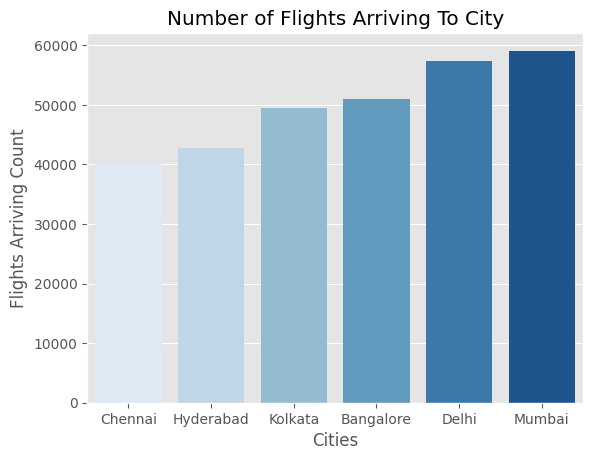

In [25]:
destination = df.groupby("destination_city").agg({"flight":"count"})
sort_destination=destination.sort_values(by="flight", ascending= True)
sns.barplot(x="destination_city",y="flight",data=sort_destination,palette="Blues")
plt.title("Number of Flights Arriving To City")
plt.xlabel("Cities")
plt.ylabel("Flights Arriving Count")


👆👆👆 This explains the Flight arrivings from other cities. Chennai receiving the less flights and Mumbai receiving Hightest number of flights fromother cities🛬🛬🛬

✈️✈️✈️ Here by observing above two charts
--> Chennai Has the lowest foot fall and Delhi,Mumbai has hightest foot fall

Text(0.5, 1.0, 'Airline Price Change with Time')

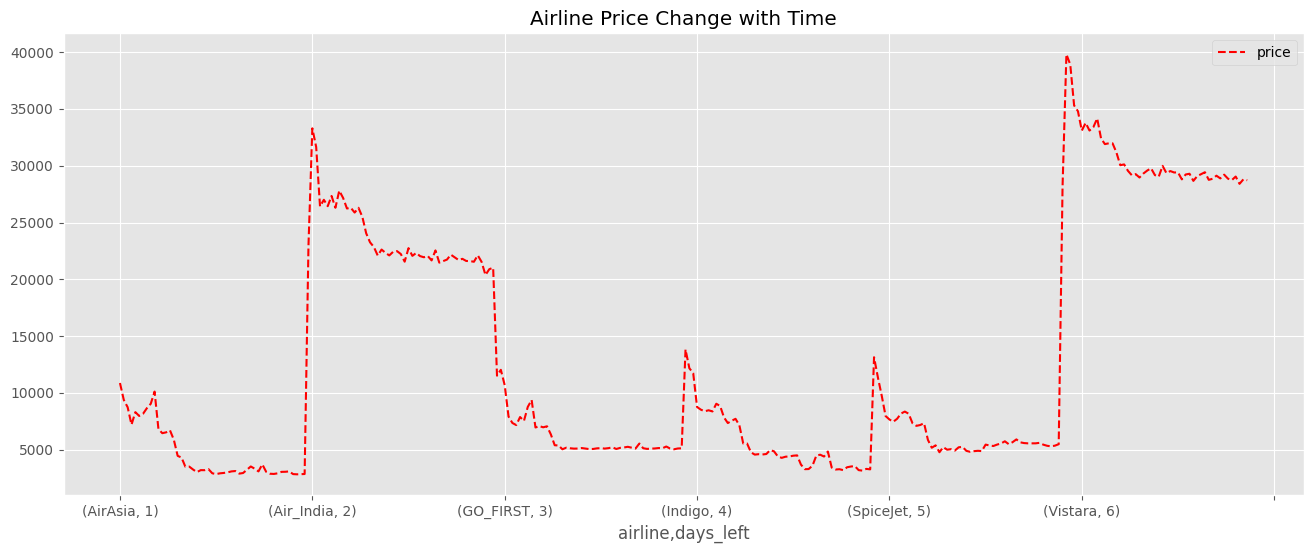

In [26]:
airline_days_vs_price = df.groupby(["airline","days_left"]).agg({"price":"mean"})
airline_days_vs_price.plot(linestyle="--",figsize=(16,6), color = "r")
plt.title("Airline Price Change with Time")


👆✈️ The average price of ticket when two classes combined

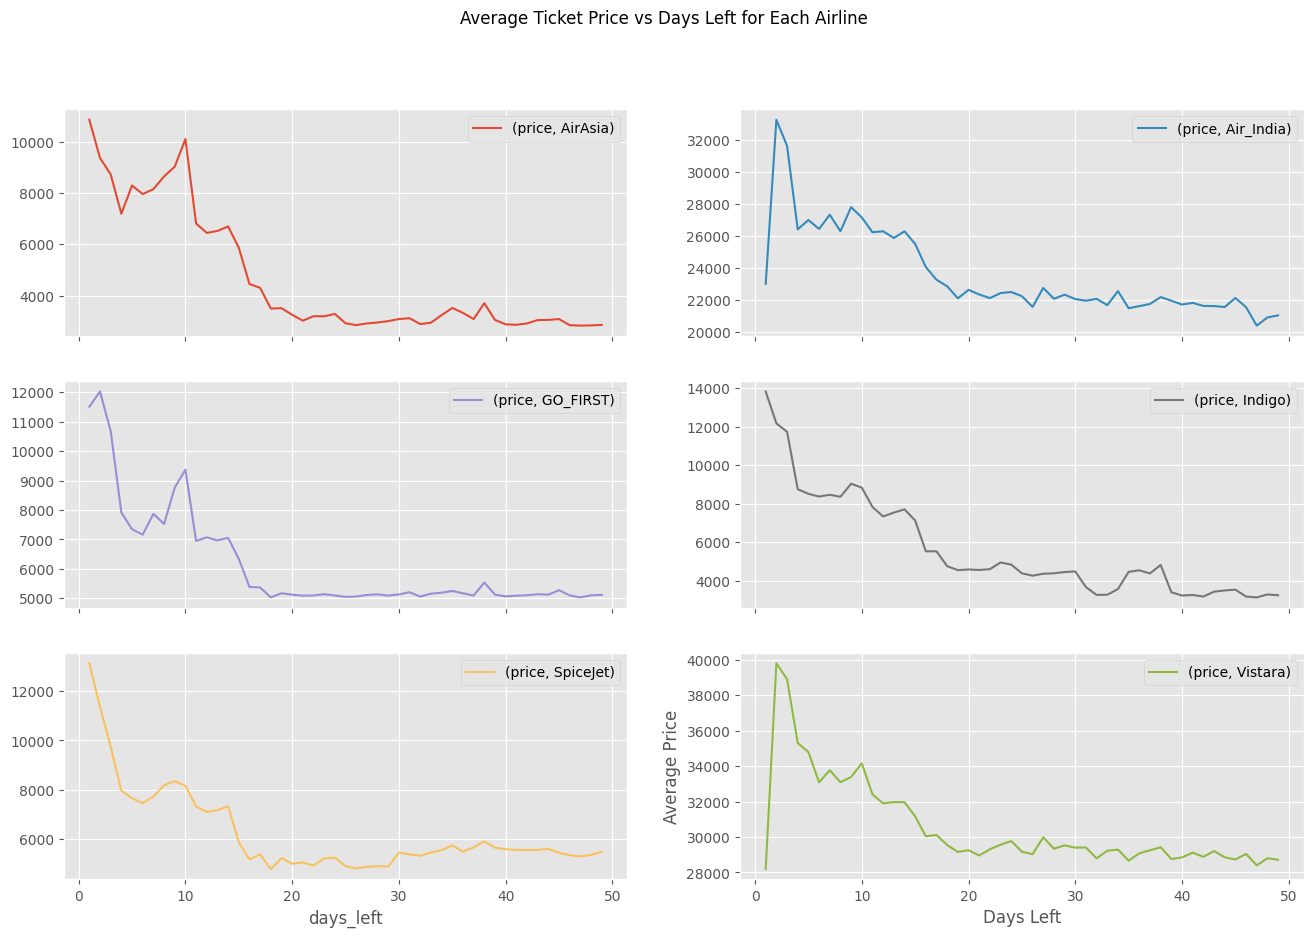

In [27]:
airline_days_vs_price = df.groupby(["airline", "days_left"]).agg({"price": "mean"}).unstack(level=0)
airline_days_vs_price.plot(kind="line", figsize=(16, 10), subplots=True, layout=(3, 2), legend=True)
plt.suptitle("Average Ticket Price vs Days Left for Each Airline")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.show()


👆✈️📉📈💹 Subplots of Avg Ticket prices offering by different Airlines ,,, We can Notice that prices of Vistara and Airindia are  higher because they are the two airlines offering Business Class in their airlines and the average is done both on  ECONOMY And BUSINESS 👇👇

Text(0.5, 1.0, 'Avg Prices offered by Airlines with Time ')

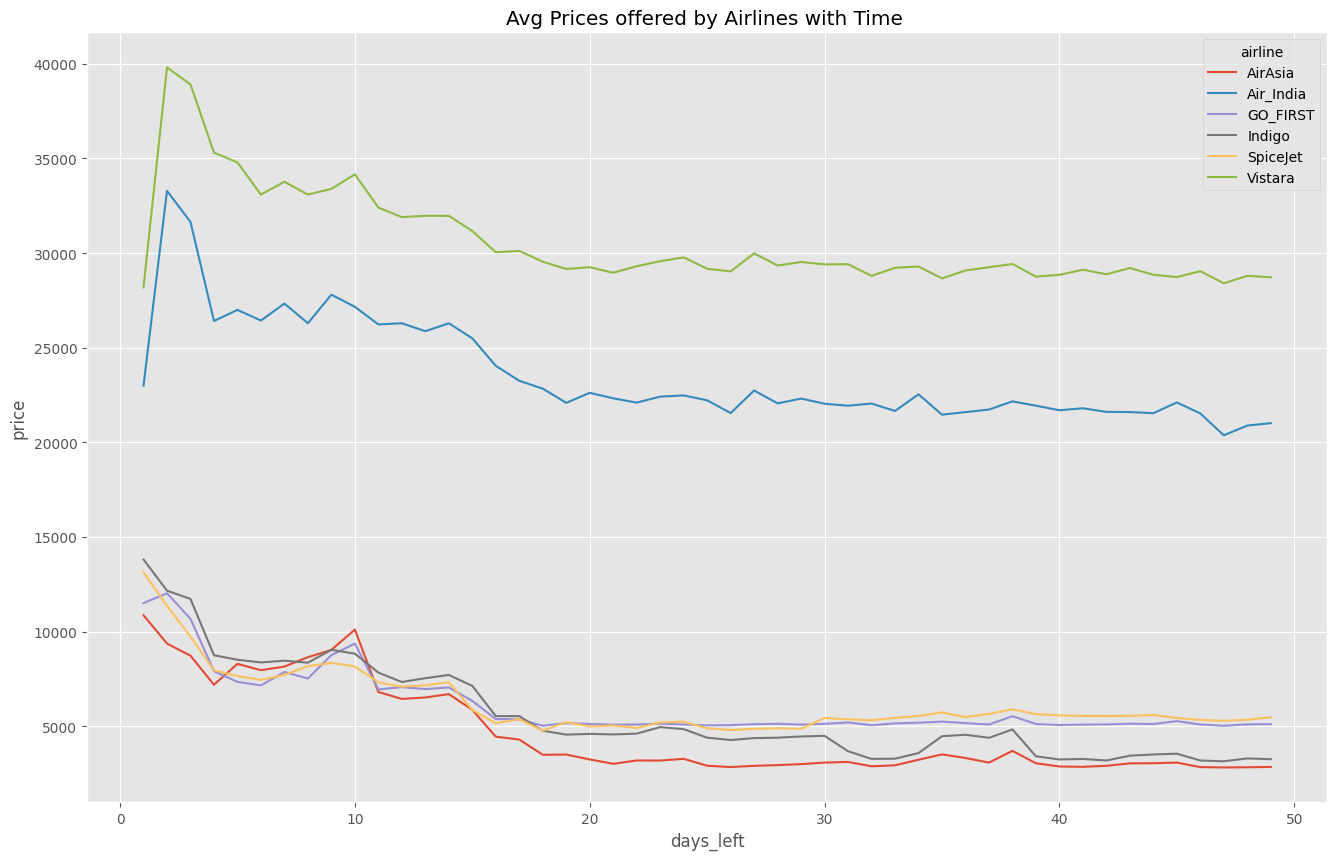

In [28]:
airline_days_vs_price = df.groupby(["airline", "days_left"]).agg({"price": "mean"})
plt.figure(figsize=(16,10))
sns.lineplot(x="days_left",y="price",data= airline_days_vs_price,hue='airline')
plt.title("Avg Prices offered by Airlines with Time ")

Text(0.5, 0, 'No Of Days Left')

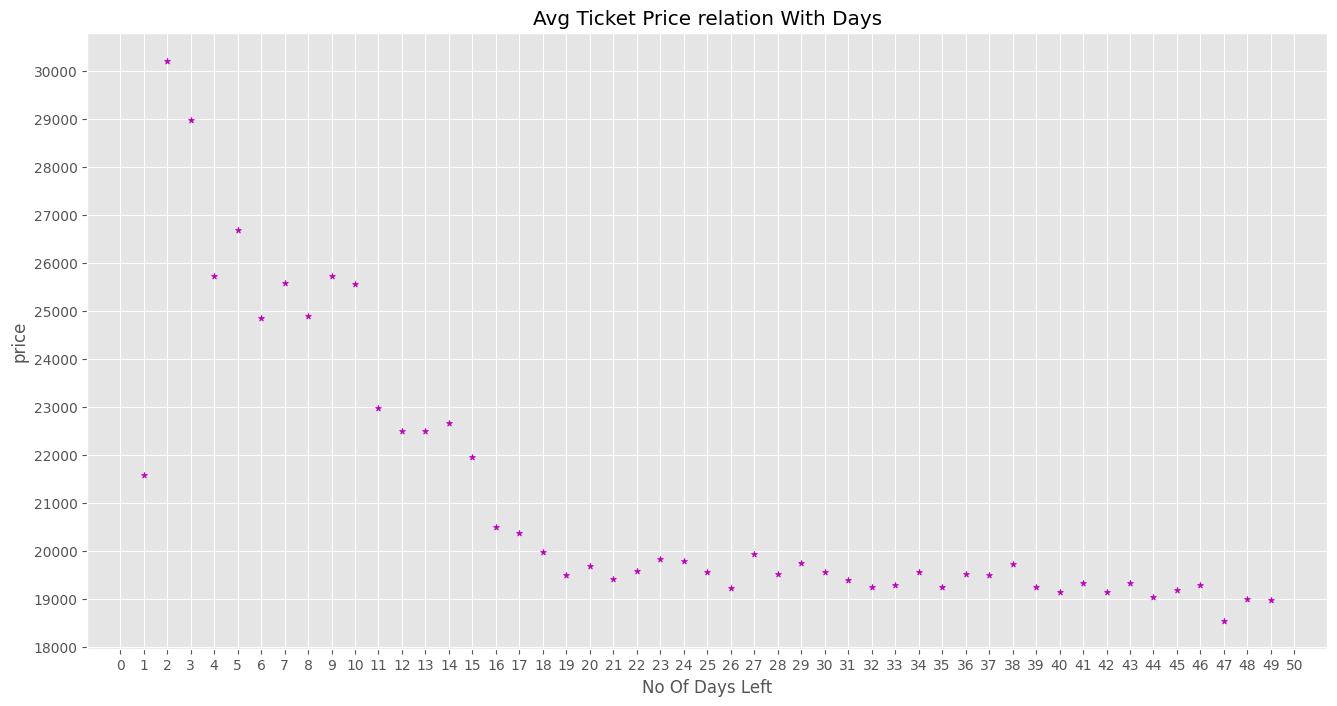

In [29]:
days_vs_price = df.groupby("days_left").agg({"price":"mean"}).reset_index()
days_vs_price.plot.scatter(x="days_left",y="price",figsize = (16,8),marker ="*",color = "m")
plt.title("Avg Ticket Price relation With Days")
plt.xticks(range(0,51,1))
plt.yticks(range(18000,31000,1000))
plt.xlabel("No Of Days Left")


👆✈️ Average Price Vary of ticket in relation to days left for booking. This tells us booking an air ticket atleast before 20 days of travelling saves funds 

Text(0.5, 0, 'Days left for booking')

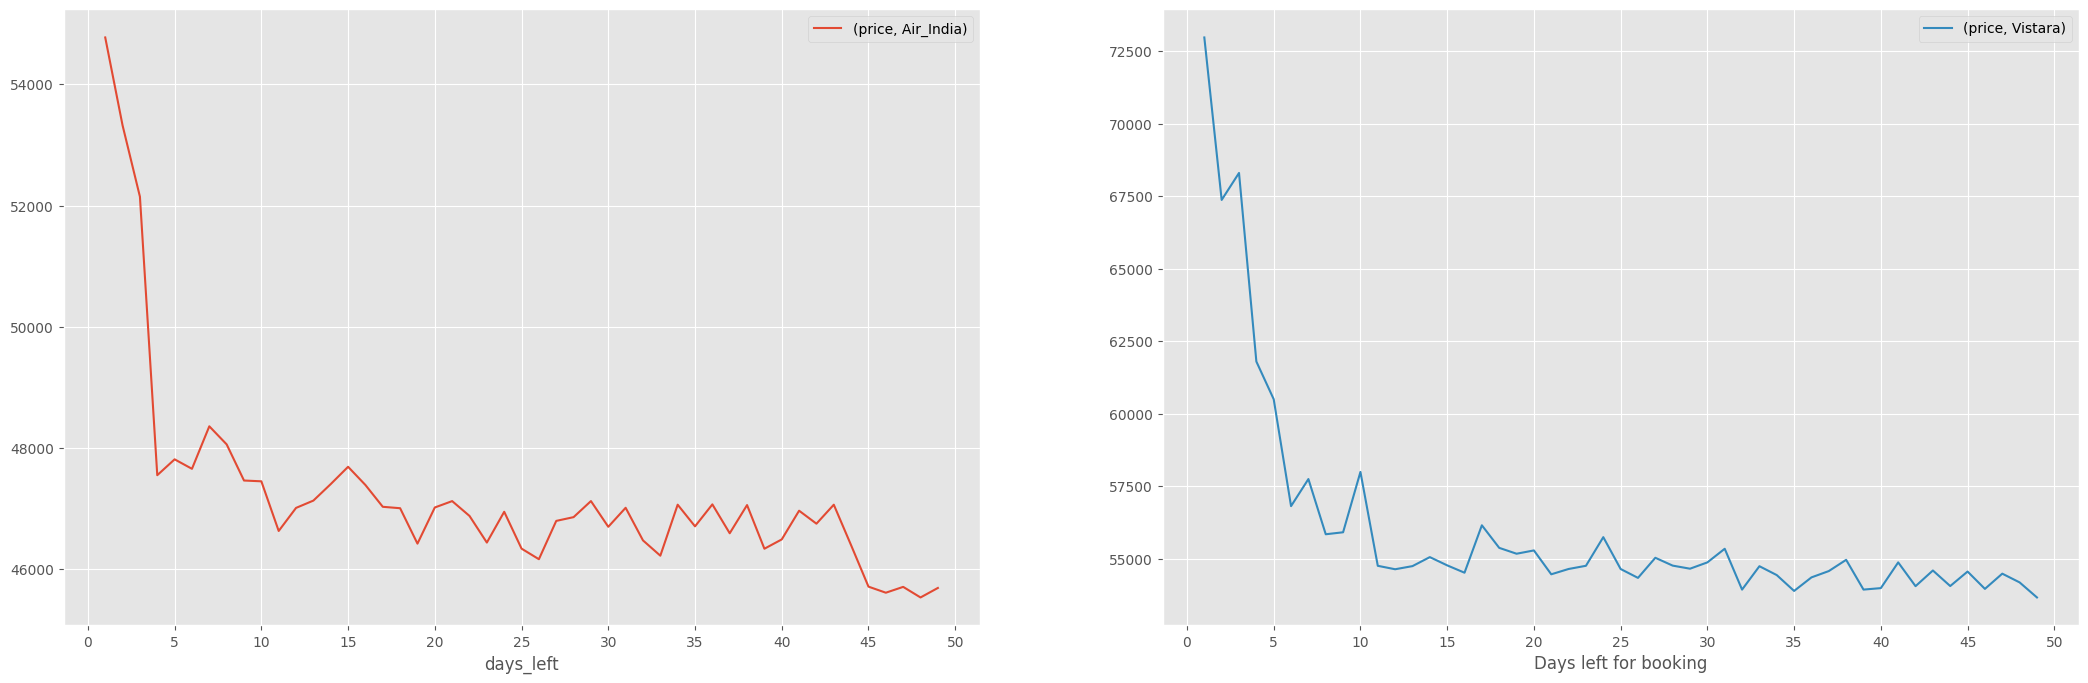

In [30]:
df4 = df[(df["class"]=="Business")].groupby(["airline","days_left"]).agg({"price":"mean"}).unstack(level=0)
df4.plot(kind= "line",subplots=True,layout=(1,2), figsize=(26,8), sharex= True)
plt.xticks(range(0,51,5))
plt.xlabel("Days left for booking")


👆👆👆 Average Ticket Price Vary in Business Classe of Air India and Vistara respective to Days left 

<Figure size 2000x800 with 0 Axes>

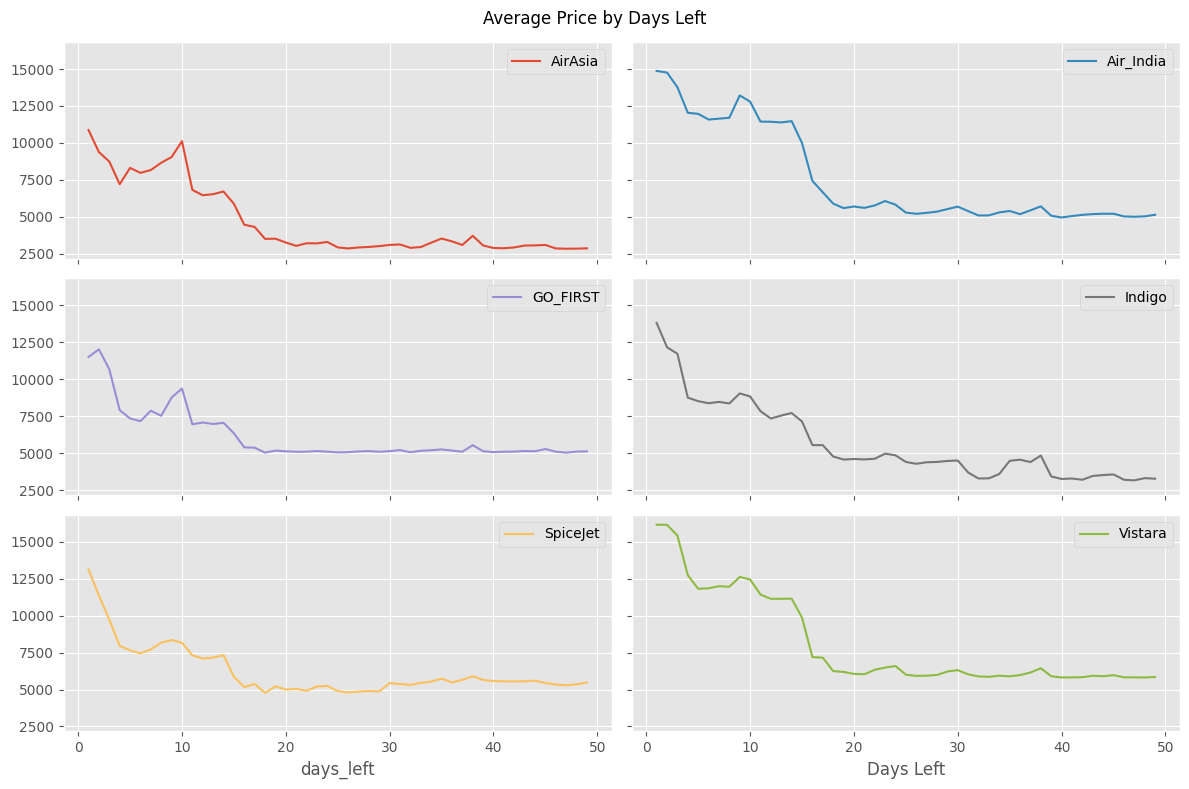

In [31]:
df5 = df[(df["class"] == "Economy")].groupby(["airline", "days_left"]).agg({"price": "mean"}).reset_index()

df_pivot = df5.pivot(index="days_left", columns="airline", values="price")
plt.figure(figsize=(20,8))
df_pivot.plot(subplots=True, layout=(3, 2), figsize=(12, 8), sharex=True, sharey=True, title="Average Price by Days Left")
plt.xlabel("Days Left")
plt.tight_layout()  
plt.show()


(0.0, 60000.0)

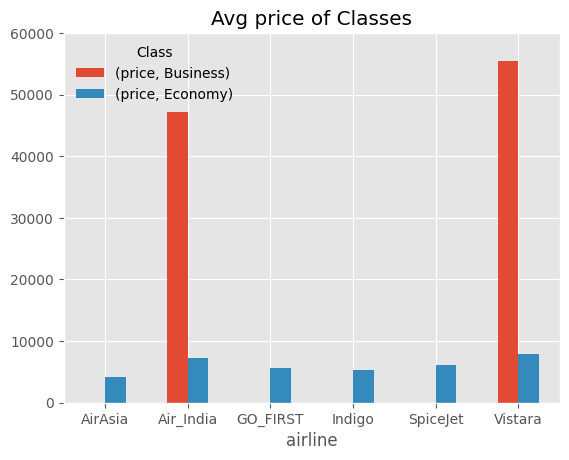

In [32]:
df2=df.groupby(["airline","class"]).agg({"price":"mean"}).round(2).unstack()
df2.plot.bar()
plt.xticks(rotation = 0)
plt.title("Avg price of Classes")
plt.legend(title = "Class",frameon = False)
plt.ylim(0,60000)

In [33]:
csdp = df.groupby(["class","source_city","destination_city"]).agg({"price":"mean"}).round()


Text(0, 0.5, 'Price Range')

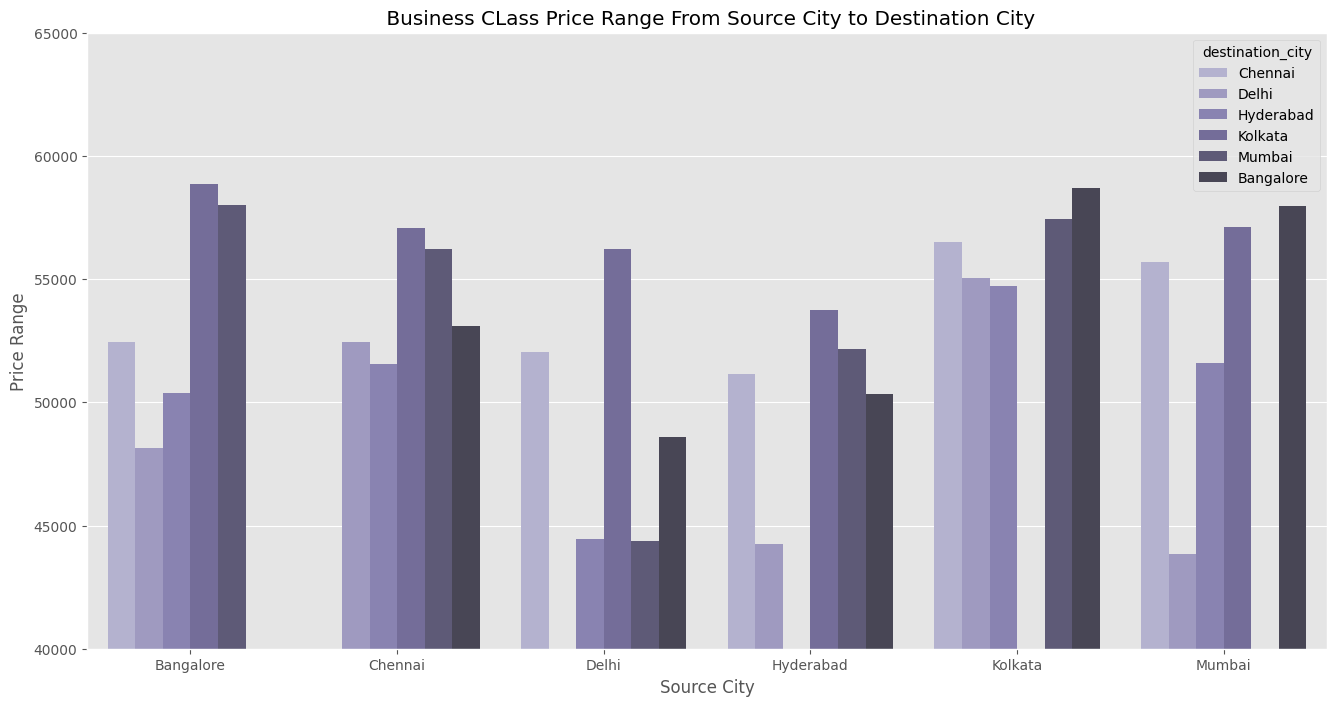

In [34]:
csdp_business = csdp.loc["Business"]
csdp_business_sort = csdp_business.sort_values(by="price",ascending=True)
plt.figure(figsize=(16,8))
sns.barplot(x="source_city", y="price",hue="destination_city",data=csdp_business,palette="Purples_d")
plt.ylim(40000,65000)
plt.title(" Business CLass Price Range From Source City to Destination City")
plt.xlabel("Source City")
plt.ylabel("Price Range")

Text(0, 0.5, 'Price Range')

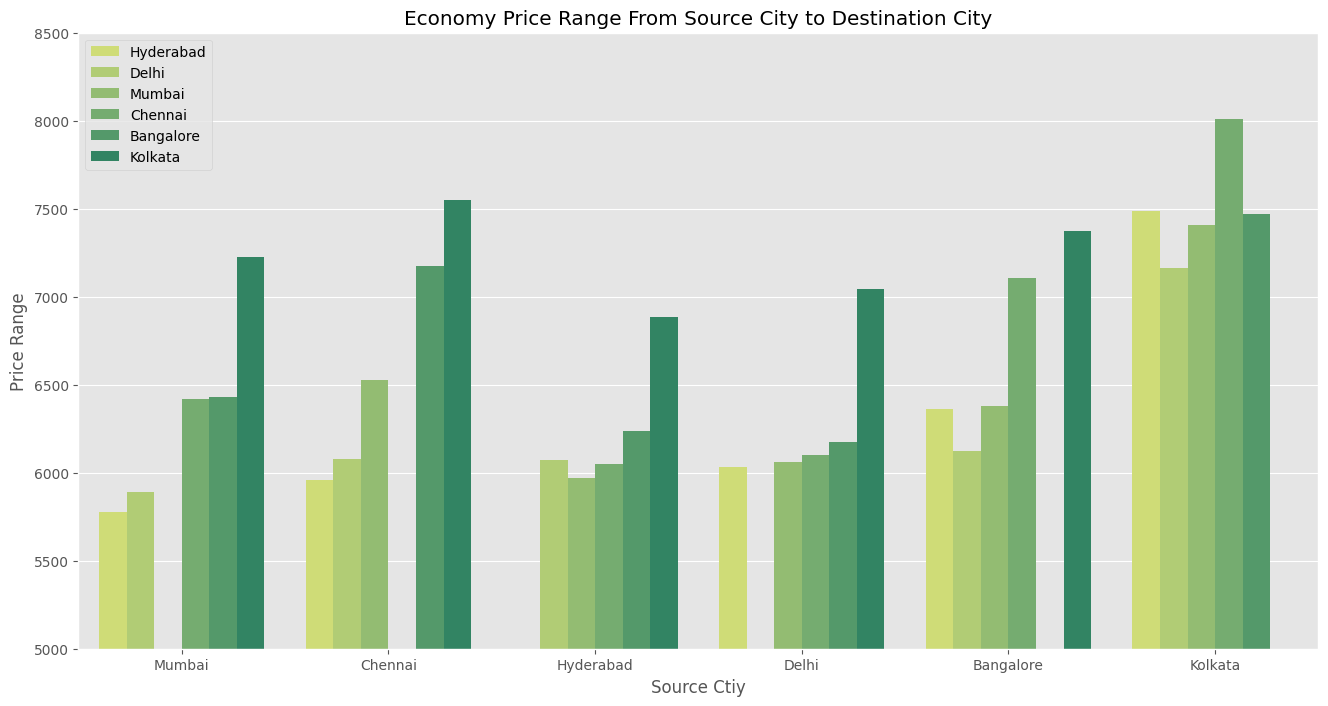

In [35]:
csdp_eco = csdp.loc["Economy"]
csdp_eco_sort = csdp_eco.sort_values(by="price", ascending= True)
plt.figure(figsize=(16,8))
sns.barplot(x="source_city",y="price",hue="destination_city",data=csdp_eco_sort,palette="summer_r")
plt.ylim(5000,8500)
plt.legend()
plt.title("Economy Price Range From Source City to Destination City")
plt.xlabel("Source Ctiy")
plt.ylabel("Price Range")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'AirAsia'),
  Text(1, 0, 'Air_India'),
  Text(2, 0, 'GO_FIRST'),
  Text(3, 0, 'Indigo'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'Vistara')])

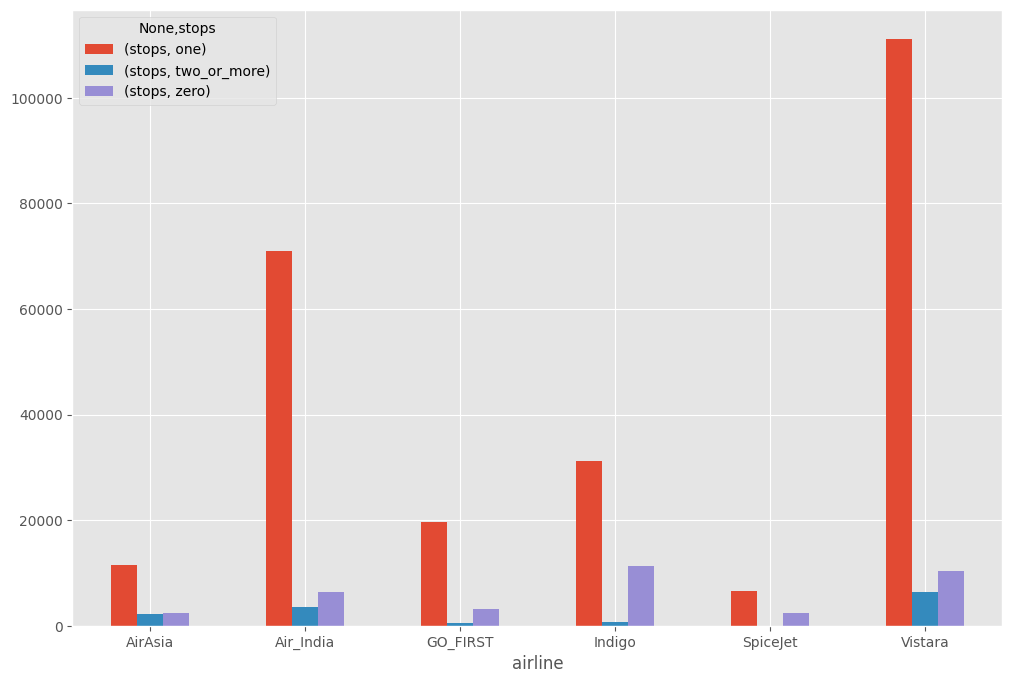

In [36]:
df6= df.groupby(["airline","stops"]).agg({"stops":"count"}).unstack()
df6.plot.bar(figsize=(12,8))
plt.xticks(rotation = 0)

(9.0, 16.0)

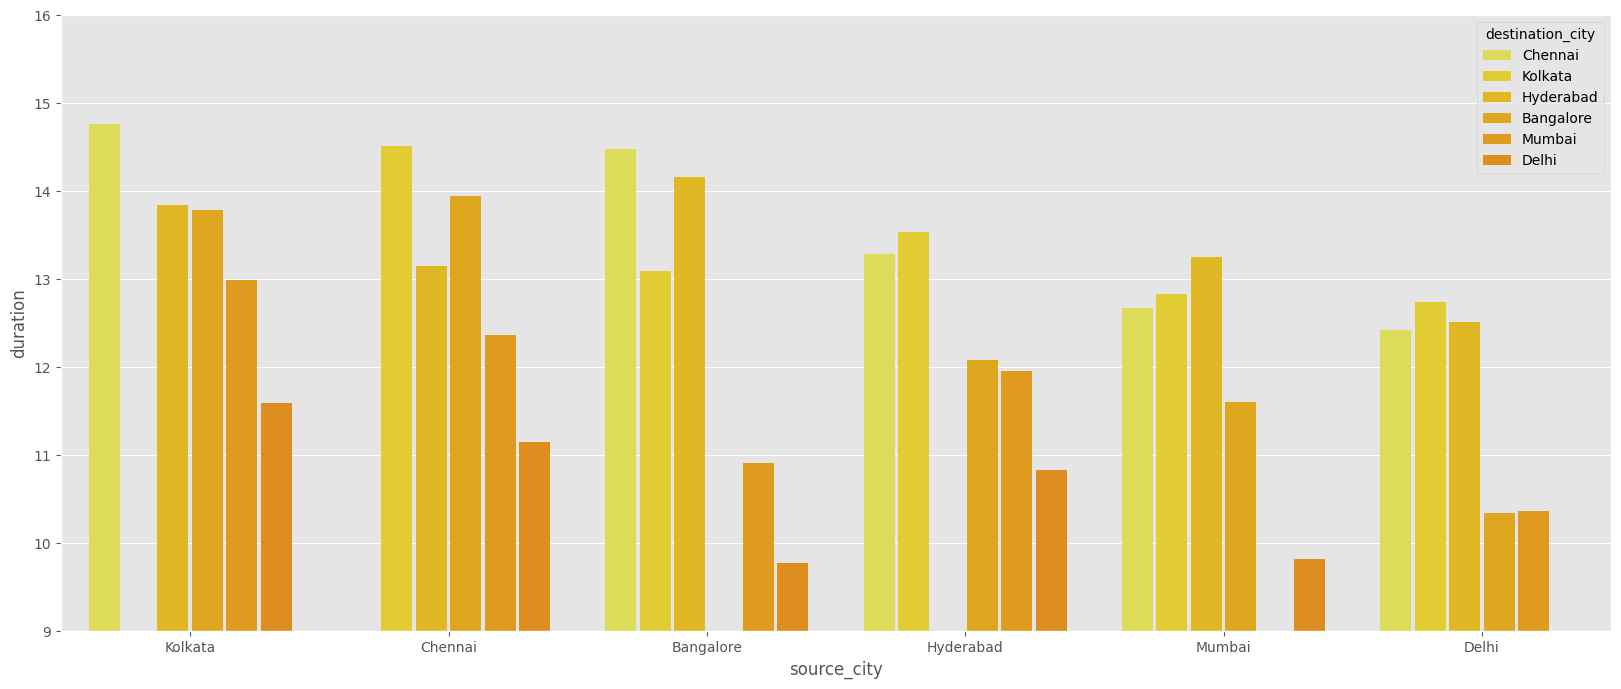

In [93]:
df7 = df.groupby([ "source_city","destination_city"]).agg({"duration":"mean"}).round(2).reset_index()
sort_df7 = df7.sort_values(by="duration", ascending= False)
plt.figure(figsize=(20,8))
sns.barplot(x="source_city",y="duration",hue="destination_city",data=sort_df7,palette="Wistia",gap=0.1)
plt.ylim(9,16)


<Axes: xlabel='price', ylabel='duration'>

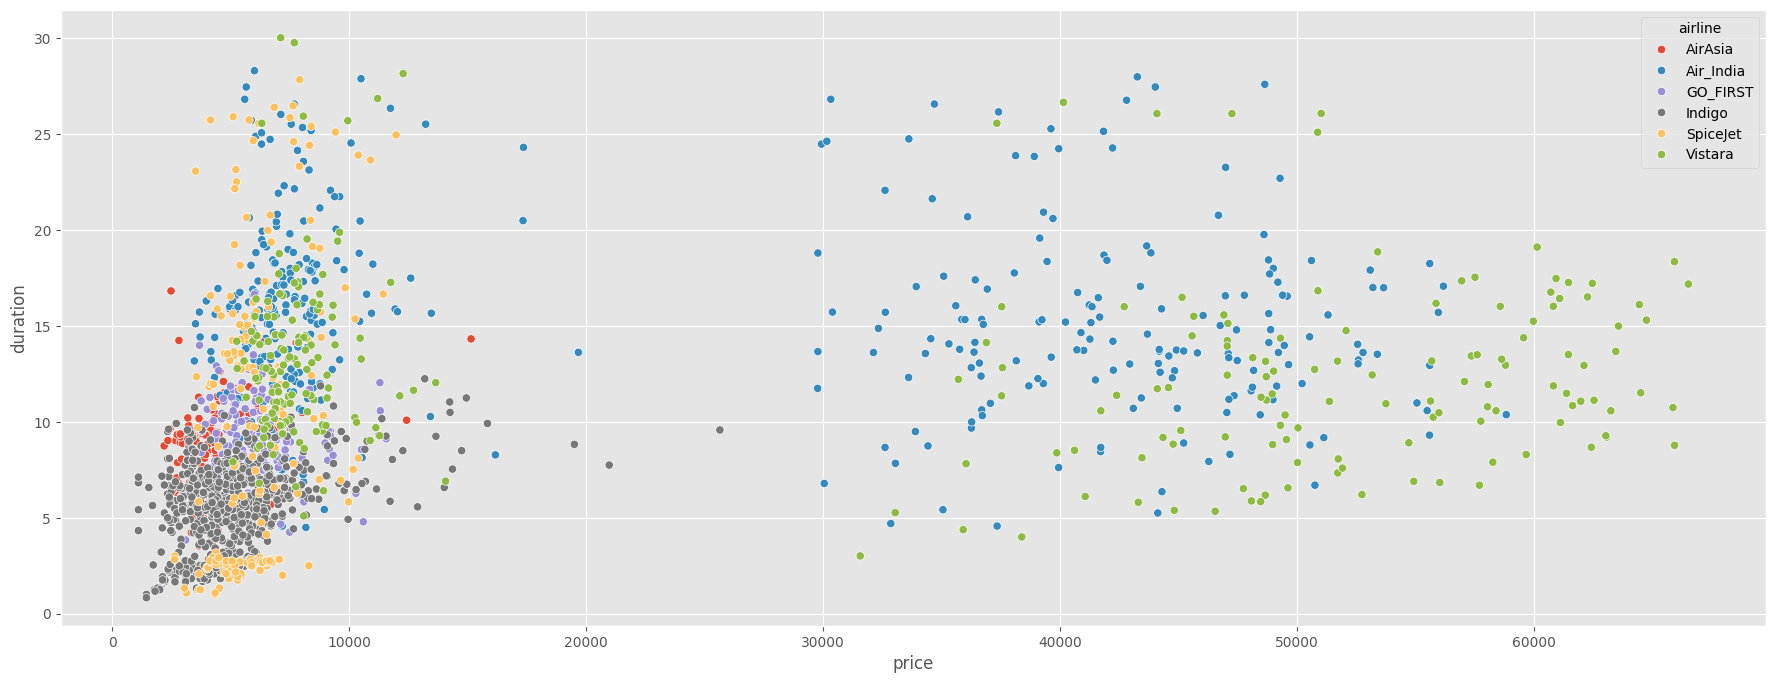

In [107]:
df8 = df.groupby(["airline","flight","class"]).agg({"duration":"mean","price":"mean"}).round(2).reset_index()
plt.figure(figsize=(22,8))
sns.scatterplot(x="price",y="duration",hue="airline",data=df8)

([<matplotlib.axis.XTick at 0x295f8e86710>,
 [Text(0, 0, '0'),
  Text(5000, 0, '5000'),
  Text(10000, 0, '10000'),
  Text(15000, 0, '15000'),
  Text(20000, 0, '20000'),
  Text(25000, 0, '25000'),
  Text(30000, 0, '30000'),
  Text(35000, 0, '35000'),
  Text(40000, 0, '40000'),
  Text(45000, 0, '45000'),
  Text(50000, 0, '50000'),
  Text(55000, 0, '55000'),
  Text(60000, 0, '60000'),
  Text(65000, 0, '65000'),
  Text(70000, 0, '70000')])

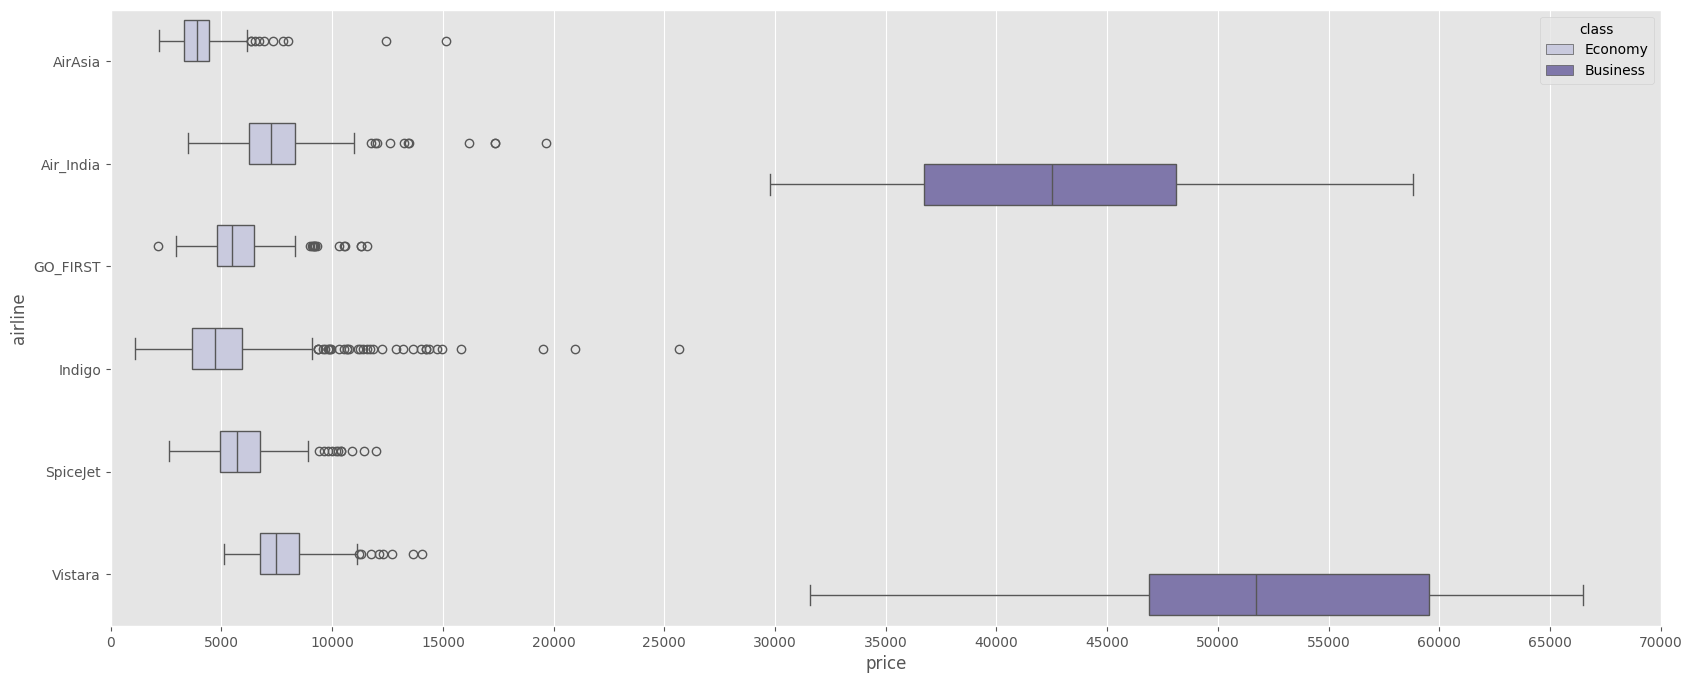

In [105]:
plt.figure(figsize=(20,8))
sns.boxplot(x="price",y="airline",hue="class",data=df8,palette="Purples")
plt.xlim(0,70001)
plt.xticks(range(0,70001,5000))

